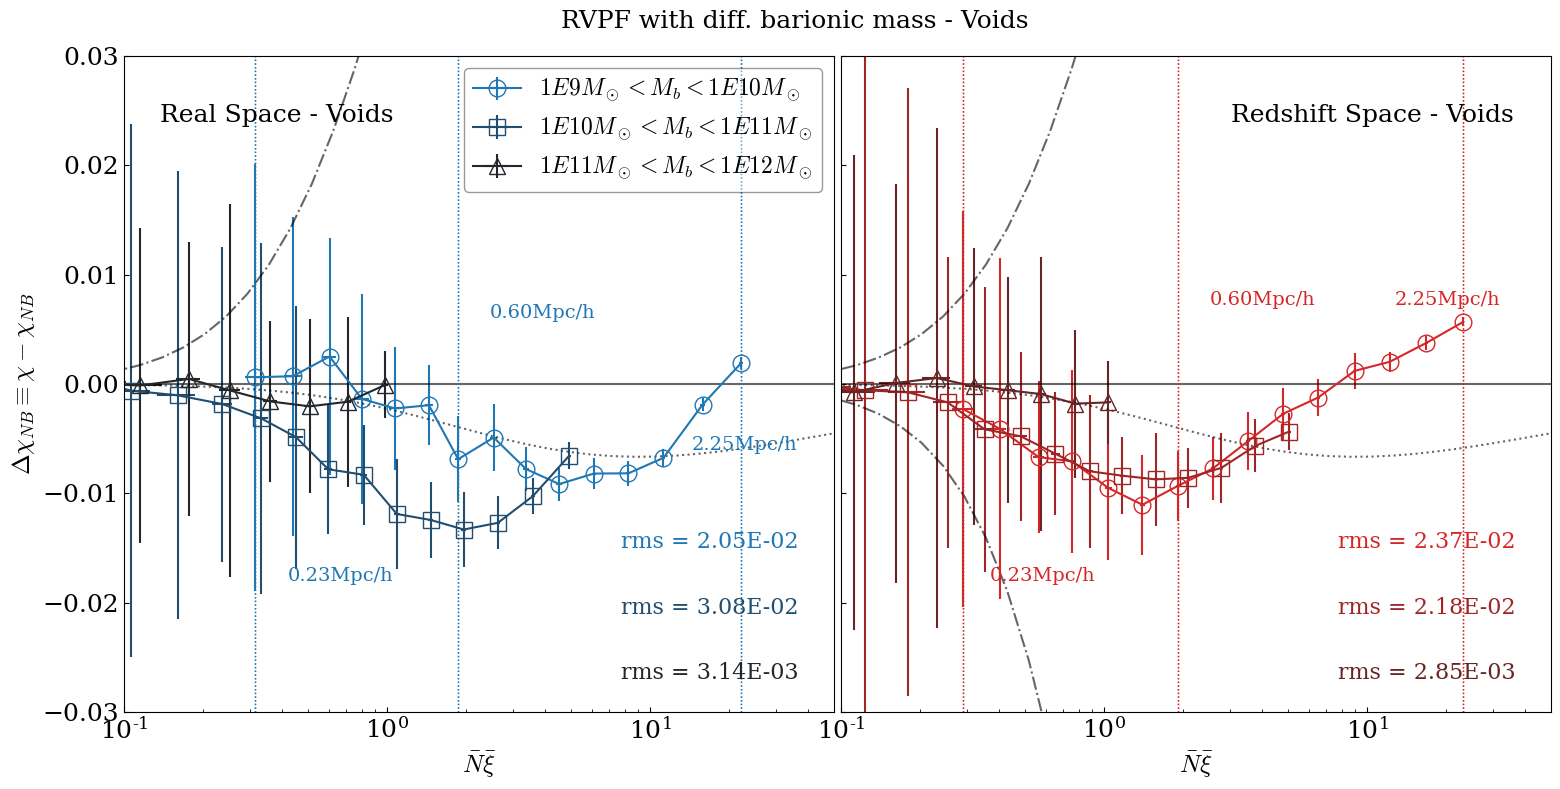

In [6]:
import numpy as np
from cicTools import *
import matplotlib.pyplot as plt
import seaborn as sns

fs = 18
ms = 12

plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

def chi_NB(x):
    return np.log(1+x)/x
def chi_T(x):
    return (np.sqrt(1+2*x)-1)/x
def chi_GH(x,a):
    return ((1+x/a)**(1-a)-1)*a/((1-a)*x)
def chi_min(x):
    return (1-np.exp(-x))/x

# a=.2
# ax.plot(x,(),label='GH',c='k',ls='--',alpha=0.6)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=False)
ax=axs[0]
ax1=axs[1]

xmin, xmax = 1E-2, 1E2 
x = np.geomspace(xmin,xmax,50)
a=1.05
ax.plot(x,chi_GH(x,a)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax1.plot(x,chi_GH(x,a)-chi_NB(x),c='k',ls=':',alpha=0.6)
ax1.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax1.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)
ax1.plot(x,chi_min(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

ax.plot(x,chi_NB(x)-chi_NB(x),c='k',alpha=0.6)
ax.plot(x,chi_T(x)-chi_NB(x),c='k',ls='-.',alpha=0.6)

# a=.2
# ax.plot(x,(1/((1-a)*(x/a)))*((1+x/a)**(1-a)-1),label='GH',c='k',ls='--',alpha=0.6)
# Q=1.2
# ax.plot(x,1-(np.euler_gamma+np.log(4*Q*x))/(8*Q),label='BBGKY',c='k',ls=':',alpha=0.6)


#---------------------------------------------------------------------------------------------

"""
REAL SPACE
"""
files = ['../data/paraFedeStasz/allgxs_nesf100000_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/paraFedeStasz/allgxs_nesf100000_invoid_jk_minMass1e10_v1e11_minradV9.0.npz',\
         '../data/paraFedeStasz/allgxs_nesf100000_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
         #'../data/paraFedeStasz/allgxs_nesf100000_invoid_jk_minMass1e12_v1e11_minradV9.0.npz']
markers = ['o','s','^']#,'o']
labels = [r'$1E9M_\odot < M_b < 1E10M_\odot$', r'$1E10M_\odot < M_b < 1E11M_\odot$',\
          r'$1E11M_\odot < M_b < 1E12M_\odot$']#,r'$1E12M_\odot < M_b < 1E13M_\odot$']
ypos_rmss = [.25,.15,.05]
colors = sns.dark_palette(sns.color_palette("tab10")[0], len(files), reverse=True)[:len(files)+1]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):

    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.23,.515,.8],[.2,.6,.4]):
            vline=ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',\
                       label=label,color=color,ms=ms)

    # RMS
    mask = np.where(NXi>1E-1)
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax.transAxes)


"""
REDSHIFT SPACE
"""
files = ['../data/paraFedeStasz/allgxs_nesf100000_redshiftz_invoid_jk_v1e11_minradV9.0.npz',\
         '../data/paraFedeStasz/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e10_v1e11_minradV9.0.npz',\
         '../data/paraFedeStasz/allgxs_nesf100000_redshiftz_invoid_jk_minMass1e11_v1e11_minradV9.0.npz']#,\
markers = ['o','s','^']#,'o']
ypos_rmss = [.25,.15,.05] 
colors = sns.dark_palette(sns.color_palette("tab10")[3], 4, reverse=True)[:3]

for file,marker,color,label,ypos_rms in zip(files,markers,colors,labels,ypos_rmss):
    #print(file)
    stats = np.load(file)

    chi = stats['arr_0']
    chi_std = stats['arr_1']
    NXi = stats['arr_2']
    NXi_std = stats['arr_3']
    P0 = stats['arr_4']
    P0_std = stats['arr_5']
    N_mean = stats['arr_6']
    N_mean_std = stats['arr_7']
    xi_mean = stats['arr_8']
    xi_mean_std = stats['arr_9']
    rs = stats['arr_10']

    # Errors
    P0err=delta_P0(P0,10E5)
    NXierr=delta_NXi(NXi,N_mean,N_mean_std,xi_mean,xi_mean_std)
    chierr=delta_chi(chi,P0,P0err,N_mean,N_mean_std)

    # Plot vlines with scales
    if marker=='o':
        space = 1.3
        lw = 1
        ls = ':'
        for ind,xpos_vline,ypos_vline in zip([0,6,-1],[.21,.52,.78],[.2,.62,.62]):
            vline=ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax1.axvline(NXi[ind],lw=lw,ls=ls,color=color)
            ax1.text(xpos_vline,ypos_vline,f'{rs[ind]/1000.:.2f}Mpc/h',\
                    size=fs-4,transform=ax1.transAxes,color=vline.get_color())

    # chi vs Nxi
    ebar = ax1.errorbar(NXi,chi-chi_NB(NXi),xerr=NXierr,yerr=chierr,marker=marker,mfc='none',label=label,color=color,ms=ms)

    # RMS
    #print(chi)
    mask = np.where(NXi>1E-1)
    #print(chi[mask])
    #chirms = chi[mask]
    #mask = np.isfinite(chirms) #filter inf and NaN
    rms = np.sqrt(np.sum((chi[mask]-chi_NB(NXi[mask]))**2))
    ax1.text(.7,ypos_rms,f'rms = {rms:.2E}',size=fs-2,color=ebar[0].get_color(),transform=ax1.transAxes)
    

# Log Scale
ax1.set_xscale('log')
ax.set_xscale('log')

# Y Labels
ax.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)
#ax1.set_ylabel(r'$\Delta\chi_{NB}\equiv\chi-\chi_{NB}$',fontsize=fs)

# X Labels
ax.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)
ax1.set_xlabel(r'$\bar{N}\bar{\xi}$',fontsize=fs)

# Set Y axis to right side
# ax1.yaxis.set_label_position("right")
# ax1.yaxis.tick_right()

# Y axis limis
ylim1,ylim2 = -.03,.03
ax.set_ylim([ylim1,ylim2])
ax1.set_ylim([ylim1,ylim2])

# X axis limits
xlim1,xlim2=1E-1,5E1
ax.set_xlim(xlim1,xlim2)
ax1.set_xlim(xlim1,xlim2)

# Legend
ax.legend(loc=1,fontsize=fs-1,ncol=1,frameon=True,framealpha=.4,edgecolor='k')

# Ticks
#ax.set_xticklabels([])
ax1.set_yticklabels([])
ax.tick_params(labelsize=fs)
ax1.tick_params(labelsize=fs)

# Additional text
ax.text(.05,.9,'Real Space - Voids',fontsize=fs,transform=ax.transAxes)
ax1.text(.55,.9,'Redshift Space - Voids',fontsize=fs,transform=ax1.transAxes)

# Final
plt.suptitle('RVPF with diff. barionic mass - Voids',fontsize=fs)
plt.tight_layout()
#plt.subplots_adjust(hspace=0,wspace=0.03)
plt.subplots_adjust(wspace=0.01)

#plt.savefig('../plots/rVPF_invoid_gxsMass.pdf')
#plt.savefig('../plots/rVPF_invoid_gxsMass.png')
plt.show()